In [34]:
import keras

#model loading
from keras.models import load_model

#image processing
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from cv2 import imread, imshow, IMREAD_GRAYSCALE, THRESH_BINARY
import cv2

#test matplotlib vs. cv2 image methods
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from keras.preprocessing import image

import numpy as np
import pandas as pd

import sys
import os
import shutil

np.set_printoptions(threshold= 200)
#np.set_printoptions(edgeitems=10)


#pd.set_option('display.max_rows', None)

## Load Data From Directories For Class Label Reference

In [4]:
train_directory = '../text-recognition/new_train'
test_directory = '../text-recognition/new_test'

In [5]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        #classes = labels_list, 
        batch_size= 39290)

Found 39290 images belonging to 147 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_directory,
        color_mode = 'grayscale',
        target_size= (64, 64),
        class_mode = 'categorical',
        #classes = labels_list,
        batch_size= 4378)

Found 4378 images belonging to 147 classes.


In [21]:
class_dictionary = train_generator.class_indices
labels = {v: k for k, v in class_dictionary.items()}
labels_list = [words for words in labels.values()]
labels_list

['Anglesey',
 'German',
 'God',
 'Government',
 'I',
 'Labour',
 'Minister',
 'Sir',
 'a',
 'about',
 'after',
 'again',
 'against',
 'all',
 'also',
 'always',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'back',
 'be',
 'been',
 'before',
 'being',
 'but',
 'by',
 'can',
 'come',
 'could',
 'did',
 'do',
 'down',
 'even',
 'ever',
 'first',
 'for',
 'found',
 'from',
 'get',
 'go',
 'good',
 'great',
 'had',
 'has',
 'have',
 'he',
 'her',
 'here',
 'him',
 'himself',
 'his',
 'how',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'know',
 'last',
 'life',
 'like',
 'little',
 'long',
 'made',
 'make',
 'man',
 'many',
 'may',
 'me',
 'men',
 'might',
 'more',
 'most',
 'much',
 'must',
 'my',
 'never',
 'new',
 'no',
 'not',
 'now',
 'of',
 'off',
 'on',
 'one',
 'only',
 'or',
 'other',
 'our',
 'out',
 'over',
 'people',
 'per',
 'said',
 'same',
 'see',
 'she',
 'should',
 'so',
 'some',
 'still',
 'such',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 

## Load Saved Keras Model

In [16]:
model = load_model('CNN200epochs.h5')


In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)         

## Reshape and Crop Functions

In [23]:
def crop_and_shape(image_path):
    
    """ image_path = image file path
        function takes in image path, converts to grayscale, 
        and reshapes to 4 dimensional array size to be compatible with ConvNet Model

    """
    desired_size = 64
    img = cv2.imread(image_path,  cv2.IMREAD_GRAYSCALE)
    img_cropped = img[200:2600, 400:3600]
    new_img_array = cv2.resize(img_cropped, (desired_size, desired_size))
    final_array = new_img_array.reshape(1, desired_size, desired_size, -1)
    
    return final_array

In [17]:
def shape_new_img(image_path):
    
    """ image_path = image file path
        function takes in image path, converts to grayscale, 
        and reshapes to 4 dimensional array size to be compatible with ConvNet Model
    """
    desired_size = 64
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img, (desired_size, desired_size))
    finalarray = new_img_array.reshape(1, desired_size, desired_size, 1)
    
    return finalarray


In [ ]:
#cropping function has not been perfected and is providing inconsistent results

In [25]:
#assign test image path to var
last = '../text-recognition/out_of_data_samples/01-last.png'

In [ ]:

numpy.set_printoptions(threshold=sys.maxsize)
last_load = load_img(last)
img_to_array(last_load)

In [26]:
rs_last = shape_new_img(last)

In [27]:
rs_last.shape

(1, 64, 64, 1)

In [30]:
rs_last

array([[[[158],
         [166],
         [170],
         ...,
         [192],
         [192],
         [190]],

        [[166],
         [161],
         [169],
         ...,
         [192],
         [190],
         [191]],

        [[165],
         [171],
         [170],
         ...,
         [193],
         [193],
         [193]],

        ...,

        [[148],
         [151],
         [149],
         ...,
         [173],
         [176],
         [170]],

        [[147],
         [146],
         [151],
         ...,
         [170],
         [172],
         [173]],

        [[146],
         [146],
         [145],
         ...,
         [169],
         [171],
         [167]]]], dtype=uint8)

In [68]:
pred = model.predict(rs_last)

In [70]:
np.argmax(pred)

37

In [71]:
labels_list[37]

'first'

In [23]:
people = '../text-recognition/out_of_data_samples/01-people.JPG'
rs_people = shape_new_img(people)

In [19]:
can = '../text-recognition/out_of_data_samples/01-can.png'
rs_can = shape_new_img(can)

In [25]:
was = '../text-recognition/out_of_data_samples/01-the.png'
rs_was = shape_new_img(was)

In [29]:
their = '../text-recognition/out_of_data_samples/01-their.png'
rs_t = shape_new_img(their)

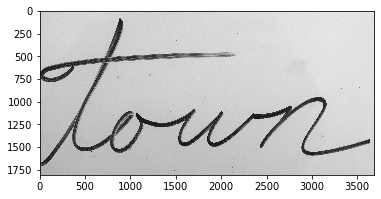

In [18]:
#know = load_img('../text-recognition/out_of_data_samples/01-know.JPG')
img = cv2.imread('../text-recognition/out_of_data_samples/01-town.JPG',  cv2.IMREAD_GRAYSCALE)
# img_cropped = img[200:2600, 200:4000]
# img_cropped

plt.imshow(img, cmap=plt.cm.gray)

In [10]:
img.shape

(1805, 3689)

In [9]:
def plot_grayscale(img_path):
    img = cv2.imread(img_path,  cv2.IMREAD_GRAYSCALE)
    return plt.imshow(img, cmap=plt.cm.gray)

    

In [30]:
pred = model.predict(rs_t)

In [153]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [32]:
labels_list[109]

'their'

In [8]:
def predict_word(word_path):
    """ Takes path to a word, reshapes, makes prediction, and returns predicted class label"""
    #make prediction and return predicted class as string
    word = word_path
    reshaped_word = shape_new_img(word)
    pred = model.predict(reshaped_word)
    get_class = np.argmax(pred)
    prediction = labels_list[get_class]
    
    #plot input image
    img = cv2.imread(word_path,  cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap=plt.cm.gray)
    return prediction
   
        

In [19]:
def predict_and_plot(word_path):
    """ 
    Takes path to a word, reshapes, makes prediction. Returns predicted class label, and a plot of the input image.
    """
    word = word_path
    reshaped_word = shape_new_img(word)
    pred = model.predict(reshaped_word)
    get_class = np.argmax(pred)
    prediction = labels_list[get_class]
     #plot input image
    img = cv2.imread(word_path,  cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap=plt.cm.gray)
    
    return prediction
    

'their'

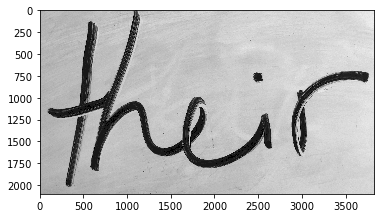

In [37]:
path = '../text-recognition/out_of_data_samples/01-their.png'
predict_and_plot(path)


In [468]:
def predict_many(word_paths):
    
    #reshape, make predictions, select class labels
    predicted_labels = []
    
    for words in word_paths: 
      
        reshaped_words = shape_new_img(words)
        pred = model.predict(reshaped_words)
        class_index = np.argmax(pred)
        predicted_labels.append(labels_list[class_index])
        
    return predicted_labels
   


In [392]:
pred = predict_many(test_path_list)

In [393]:
pred

['will',
 'with',
 'well',
 'with',
 'well',
 'well',
 'your',
 'your',
 'your',
 'you',
 'again',
 'your',
 'your',
 'your',
 'would',
 'which',
 'Government',
 'man',
 'from',
 'their',
 'man',
 'there',
 'man',
 'which',
 'our',
 'which',
 'man',
 'with',
 'most',
 'most',
 'know',
 'their',
 'must',
 'much',
 'much',
 'against',
 'which',
 'little',
 'little',
 'little',
 'little',
 'with',
 'little',
 'Minister',
 'should',
 'Minister',
 'with',
 'should',
 'us',
 'at',
 'last',
 'my',
 'him',
 'your',
 'his',
 'against',
 'again',
 'again',
 'again',
 'it',
 'like',
 'like',
 'like',
 'with',
 'the',
 'told',
 'the',
 'like',
 'when',
 'like',
 'now',
 'new',
 'like',
 'will',
 'like',
 'in',
 'will',
 'in',
 'like',
 'year',
 'was',
 'can',
 'being',
 'years',
 'years',
 'your',
 'your',
 'years',
 'year',
 'years',
 'your',
 'against',
 'Government',
 'Government',
 'Government',
 'Government',
 'Government',
 'a',
 'life',
 'life',
 'he',
 'he',
 'a',
 'life',
 'if',
 'the',
 

In [219]:
full_path = []

for root, dirs, files in os.walk('new_test'):
        for name in files:
#             if name in the_directories:
            full_path.append(os.path.join(root, name))
            
                
                
                
# for root, dirs, files in os.walk("words"):
#     for name in files:
#         test_array.append(os.path.join(root, name))
#     for name in dirs:
#         test_array.append(os.path.join(root, name))
#     #for new in name:
#         #if '.png' in new:
#            # png_array.append(os.path.join(root, name))                

new_test .DS_Store
new_test unique_words.txt
new_test/well f04-100-03-04.png
new_test/well f07-069-01-05.png
new_test/well l07-080-00-04.png
new_test/well g06-037p-01-03.png
new_test/well c04-116-00-16.png
new_test/well g06-037i-01-05.png
new_test/your d04-071-03-02.png
new_test/your m06-083-06-08.png
new_test/your d04-062-01-10.png
new_test/your d04-062-01-00.png
new_test/your r02-013-09-04.png
new_test/your d04-053-07-01.png
new_test/your p02-115-06-06.png
new_test/your r03-110-02-08.png
new_test/man d04-012-03-06.png
new_test/man g06-047f-00-02.png
new_test/man g06-050k-05-03.png
new_test/man k04-050-04-09.png
new_test/man g06-105-01-06.png
new_test/man n06-194-00-11.png
new_test/man p06-242-02-09.png
new_test/man p02-109-04-04.png
new_test/man n04-068-02-05.png
new_test/man g06-047o-00-02.png
new_test/man g06-050r-04-04.png
new_test/man c03-021d-01-02.png
new_test/man b01-113-00-02.png
new_test/most r03-096-01-07.png
new_test/most g04-098-04-05.png
new_test/most e02-086-02-00.png
n

In [361]:
test_path_list = full_path[2:]
test_path_list[:3]

['new_test/well/f04-100-03-04.png',
 'new_test/well/f07-069-01-05.png',
 'new_test/well/l07-080-00-04.png']

In [409]:
split_path = []
for items in test_path_list:
    split_path.append(items.split('/'))
    
split_word = []
split_img = []
for items in split_path:
    split_word.append(items[1])
    split_img.append(items[2])
    
actual = pd.DataFrame(split_word)

pred = pd.DataFrame(pred)

img_df = pd.DataFrame(split_img)

In [397]:
predictions.head()

,0_x,0_y
0,well,will
1,well,with
2,well,well
3,well,with
4,well,well


In [420]:
img_actual = img_df.merge(actual, left_index = True, right_index = True)
all_ = img_actual.merge(pred, left_index = True, right_index = True)
#output = predictions.merge(img_df, left_index = True, right_index = False)

df = all_.rename(columns = {'0_x': 'file_name', '0_y': 'actual', 0 : 'predicted'})

In [449]:
df.head(20)

,file_name,actual,predicted
0,f04-100-03-04.png,well,will
1,f07-069-01-05.png,well,with
2,l07-080-00-04.png,well,well
3,g06-037p-01-03.png,well,with
4,c04-116-00-16.png,well,well
5,g06-037i-01-05.png,well,well
6,d04-071-03-02.png,your,your
7,m06-083-06-08.png,your,your
8,d04-062-01-10.png,your,your
9,d04-062-01-00.png,your,you


In [35]:
#img_path = '../text-recognition/new_test/' + df['actual'][16] + '/' + df['file_name'][16]

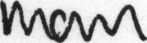

In [452]:
load_img(img_path)

In [83]:
town = '../text-recognition/out_of_data_samples/01-town.JPG'
predict_word(town)

'time'

In [85]:
town_printed = '../text-recognition/out_of_data_samples/02-town.JPG'
predict_word(town_printed)

'town'

In [81]:
predict_word(their)

'their'

In [47]:
were = '../text-recognition/out_of_data_samples/01-were.JPG'
predict_word(were)

['were']

In [ ]:
import cv2
image = cv2.imread(people)
cv2.imshow('regular', image)

inv = cv2.bitwise_not(image)
cv2.imshow('inversion', inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Testing Cropping Methods

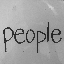

In [108]:
img = load_img(people, color_mode = 'grayscale', target_size = (64,64))
#array = img_to_array(img)
#img = cv2.imread(people,  cv2.IMREAD_GRAYSCALE)
#threshed = cv2.THRESH_BINARY(array)
#img_cropped = img[200:2600, 400:3600]
#plt.imshow(img_cropped)
img

In [25]:
img = cv2.imread('../text-recognition/out_of_data_samples/01-last.png',  cv2.IMREAD_GRAYSCALE)

In [26]:
img_cropped = img[200:2600, 400:3600]

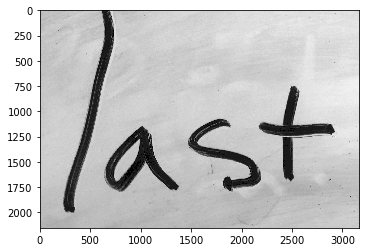

In [30]:
plt.imshow(img_cropped, cmap = plt.cm.gray)

In [33]:

# img = cv2.imread('../text-recognition/out_of_data_samples/01-last.png', cv2.IMREAD_GRAYSCALE)

# # increase contrast
# pxmin = np.min(img)
# pxmax = np.max(img)
# imgContrast = (img - pxmin) / (pxmax - pxmin) * 255

# # increase line width
# kernel = np.ones((3, 3), np.uint8)
# imgMorph = cv2.erode(imgContrast, kernel, iterations = 1)

# # write
# cv2.imwrite('out.png', imgMorph)

True

In [28]:
new_img_array = cv2.resize(img_cropped, (64,64))

In [36]:
new_img_array

array([[162, 162, 164, ..., 186, 189, 182],
       [156, 162, 160, ..., 184, 182, 188],
       [160, 156, 165, ..., 188, 187, 189],
       ...,
       [150, 151, 149, ..., 175, 170, 168],
       [154, 151, 143, ..., 167, 172, 167],
       [149, 145, 143, ..., 172, 164, 167]], dtype=uint8)

In [48]:
final_array = new_img_array.reshape(1, 64, 64, -1)

In [50]:
final_array

array([[[[165],
         [161],
         [168],
         ...,
         [184],
         [182],
         [181]],

        [[162],
         [169],
         [173],
         ...,
         [186],
         [183],
         [185]],

        [[167],
         [166],
         [166],
         ...,
         [184],
         [186],
         [182]],

        ...,

        [[154],
         [155],
         [156],
         ...,
         [156],
         [151],
         [160]],

        [[155],
         [154],
         [159],
         ...,
         [160],
         [164],
         [169]],

        [[152],
         [154],
         [155],
         ...,
         [162],
         [166],
         [164]]]], dtype=uint8)

In [38]:
64*64

4096